In [7]:
# 📦 필수 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import platform

# 시스템이 Windows인지 확인
if platform.system() == 'Windows':
    # 기본 한글 폰트 설정 (예: 'Malgun Gothic')
    plt.rc('font', family='Malgun Gothic')
else:
    # macOS 또는 Linux일 경우 예외 처리 (필요 시 다른 폰트 설정)
    plt.rc('font', family='AppleGothic')  # mac용
    # Linux는 별도로 설치 필요할 수 있음

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


## 전체 데이터 EDA

In [15]:
# 📂 데이터 불러오기
df = pd.read_csv('../../1_preprocessing/JY/features_v1.csv', dtype={'stock_code':str, 'year':str})
df = df.drop(['Unnamed: 0'], axis=1)

✅ 데이터 shape: (16678, 35)

📋 컬럼 목록:
 ['corp_nm', 'stock_code', 'year', '부채비율', '유동비율', '자기자본비율', '고정자산비율', '고정비율', '순운전자본비율', '현금비율', '현금흐름부채비율', '자본잠식여부', '총자산증가율', '유동자산증가율', '매출액증가율', '순이익증가율', '영업이익증가율', '현금자산비율', '자산대비영업현금흐름', 'ln자산총계', 'ln매출액', 'ROE', 'ROA', '총자산영업이익율', '이익잉여금비율', '매출총이익률', '총자산회전율', '비유동자산회전율', '매출원가율', '판관비율', '매출채권회전율', '재고자산회전율', '재무활동의존도', '현금보유율', 'is_defaulted']

❓ 결측치 현황:
 corp_nm         0
stock_code      0
year            0
부채비율            0
유동비율            0
자기자본비율          0
고정자산비율          0
고정비율            0
순운전자본비율         0
현금비율            0
현금흐름부채비율        0
자본잠식여부          0
총자산증가율          0
유동자산증가율         0
매출액증가율          0
순이익증가율          0
영업이익증가율         0
현금자산비율          0
자산대비영업현금흐름      0
ln자산총계          0
ln매출액           0
ROE             0
ROA             0
총자산영업이익율        0
이익잉여금비율         0
매출총이익률          0
총자산회전율          0
비유동자산회전율        0
매출원가율           0
판관비율            0
매출채권회전율         0
재고자산회전율         0
재무활동의존도         0


,count,mean,std,min,25%,50%,75%,max
부채비율,16678.0,1.011748,11.107566,-298.061714,0.269687,0.601213,1.097380,1.151595e+03
유동비율,16678.0,3.033774,5.552646,0.015190,1.019461,1.641308,3.099600,2.678114e+02
자기자본비율,16678.0,0.609195,0.226195,-2.627687,0.470890,0.619736,0.782969,9.960850e-01
고정자산비율,16678.0,0.529469,0.192951,0.014982,0.391522,0.537092,0.673699,9.962866e-01
고정비율,16678.0,1.086102,5.187718,-135.784134,0.573917,0.860069,1.255492,5.325704e+02
순운전자본비율,16678.0,0.174832,0.311274,-10.256865,0.006386,0.174907,0.357007,9.725091e-01
현금비율,16678.0,0.662033,1.625731,0.000090,0.083756,0.243894,0.651096,7.076169e+01
현금흐름부채비율,16678.0,0.153665,0.628841,-27.824687,-0.026886,0.103387,0.290477,8.473989e+00
자본잠식여부,16678.0,0.007255,0.084870,0.000000,0.000000,0.000000,0.000000,1.000000e+00
총자산증가율,16678.0,0.114372,0.381844,-0.934063,-0.024450,0.043378,0.147197,8.906192e+00


c:\Users\tktk5\Downloads\RiskRadar\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


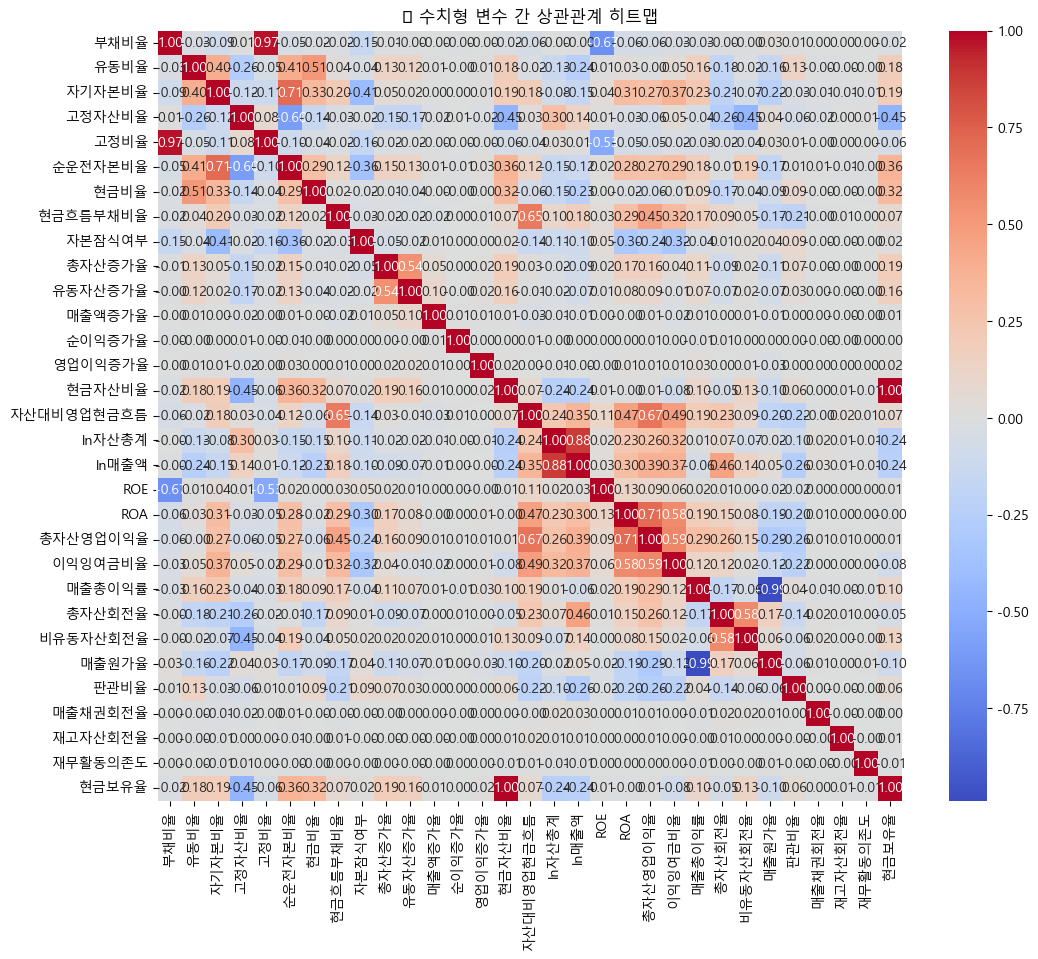

C:\Users\tktk5\AppData\Local\Temp\ipykernel_19988\1446762721.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm', orient='h')


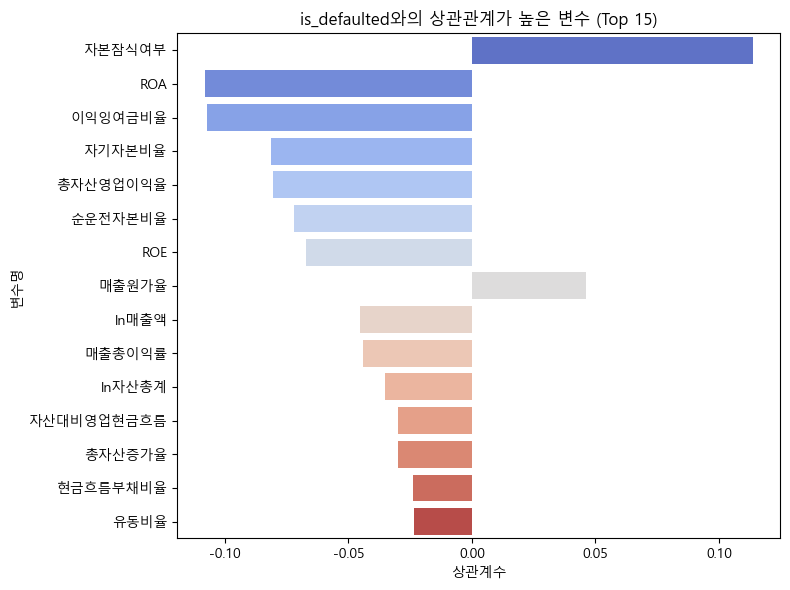

C:\Users\tktk5\AppData\Local\Temp\ipykernel_19988\1446762721.py:48: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\tktk5\Downloads\RiskRadar\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


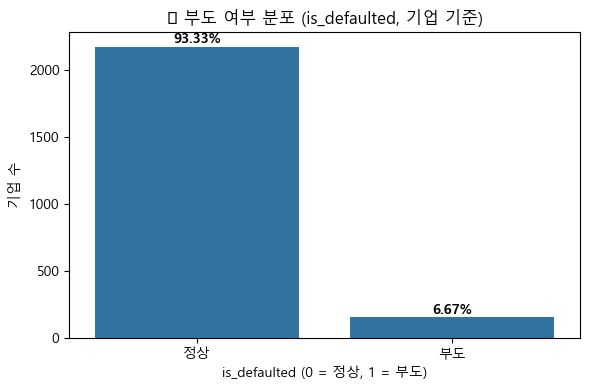

In [16]:
# 📌 기본 정보
print("✅ 데이터 shape:", df.shape)
print("\n📋 컬럼 목록:\n", df.columns.tolist())
print("\n❓ 결측치 현황:\n", df.isnull().sum())

# ⚙️ 수치형 컬럼 추출 (is_defaulted 제외)
numeric_cols = df.select_dtypes(include=np.number).columns.drop("is_defaulted")

# 📊 기초 통계 요약
display(df[numeric_cols].describe().T)

# 🔗 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("🔗 수치형 변수 간 상관관계 히트맵")
plt.show()

# 🎯 is_defaulted와의 상관계수 Top 15 시각화
correlations = df[numeric_cols].corrwith(df['is_defaulted']).sort_values(key=lambda x: abs(x), ascending=False)
top_corr = correlations.iloc[:15]

plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm', orient='h')
plt.title('is_defaulted와의 상관관계가 높은 변수 (Top 15)')
plt.xlabel('상관계수')
plt.ylabel('변수명')
plt.tight_layout()
plt.show()

# 📊 Annotated Bar Plot: is_defaulted 분포
# 회사별로 is_defaulted가 1인 경우가 있으면 1, 아니면 0
company_df = df.groupby('corp_nm')['is_defaulted'].max().reset_index()

count_series = company_df['is_defaulted'].value_counts()
percent_series = company_df['is_defaulted'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=count_series.index, y=count_series.values)
plt.title("📉 부도 여부 분포 (is_defaulted, 기업 기준)")
plt.xlabel("is_defaulted (0 = 정상, 1 = 부도)")
plt.ylabel("기업 수")
plt.xticks([0, 1], ['정상', '부도'])

for i, val in enumerate(count_series.values):
    percent = percent_series[i]
    ax.text(i, val + 5, f'{percent:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## VIF

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성 확인을 위한 VIF 계산
X = df[numeric_cols]
# X = X.dropna()  # 결측치 제거

vif_data = pd.DataFrame()
vif_data['변수명'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values('VIF', ascending=False))

c:\Users\tktk5\Downloads\RiskRadar\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


           변수명          VIF
14      현금자산비율          inf
30       현금보유율          inf
16      ln자산총계  3355.118161
17       ln매출액  3075.274258
25       매출원가율   130.780958
0         부채비율    50.464609
4         고정비율    40.975601
3       고정자산비율    29.941763
2       자기자본비율    27.409560
22      매출총이익률    25.637352
23      총자산회전율    17.555223
5      순운전자본비율     6.309972
18         ROE     3.635628
20    총자산영업이익율     3.548645
15  자산대비영업현금흐름     3.040267
24    비유동자산회전율     2.591152
19         ROA     2.284116
1         유동비율     2.279534
21     이익잉여금비율     2.066755
7     현금흐름부채비율     1.959976
6         현금비율     1.822836
9       총자산증가율     1.698267
10     유동자산증가율     1.526244
8       자본잠식여부     1.495129
26        판관비율     1.467340
11      매출액증가율     1.013583
13     영업이익증가율     1.002882
27     매출채권회전율     1.002830
28     재고자산회전율     1.001403
12      순이익증가율     1.000776
29     재무활동의존도     1.000704


## 정상 vs 부도

### 1. Histogram + Box + Violin Plot

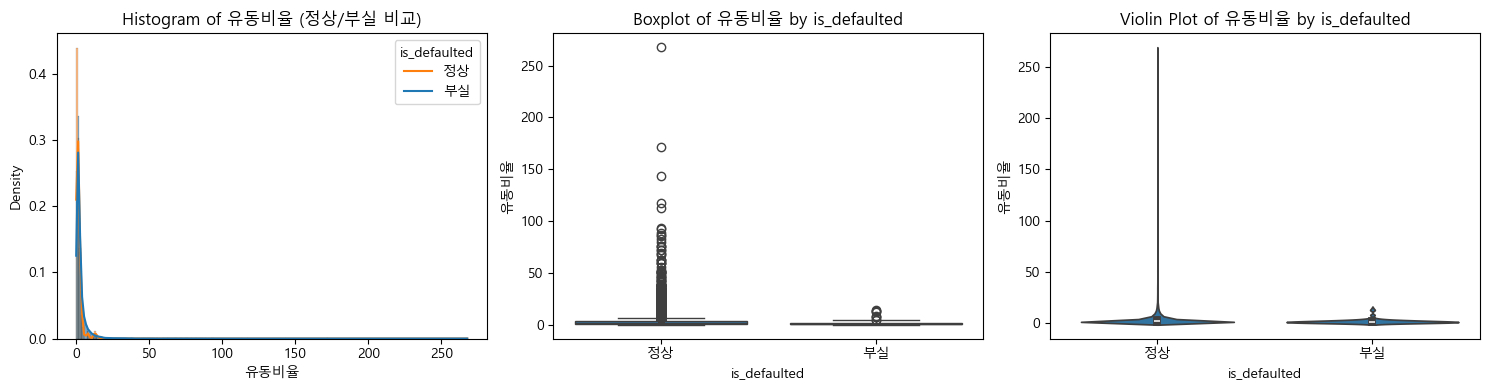

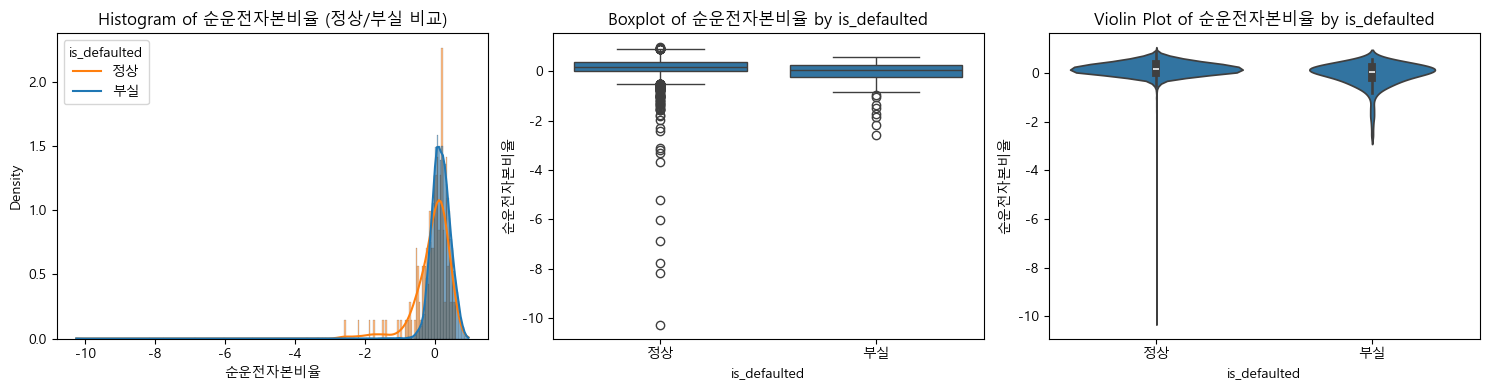

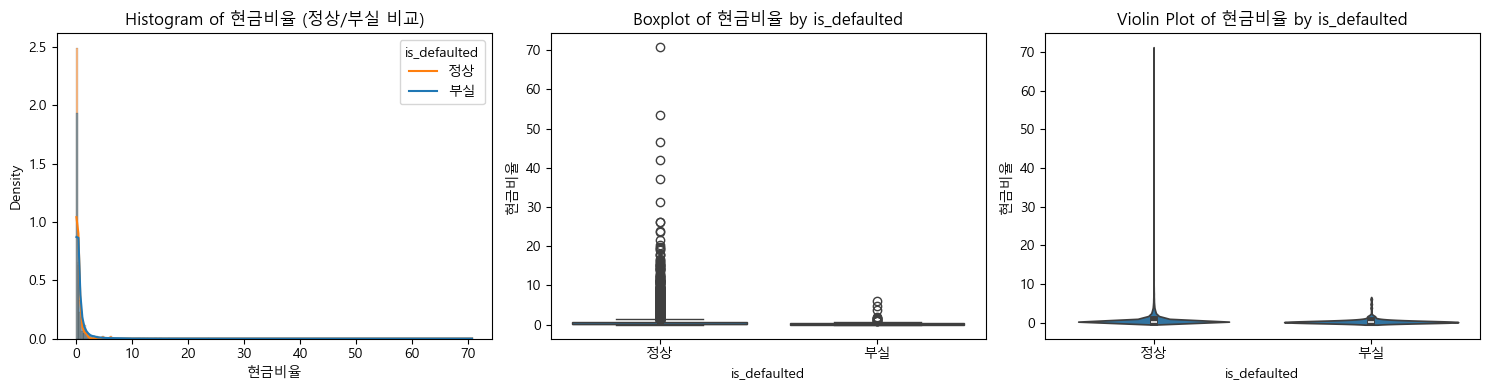

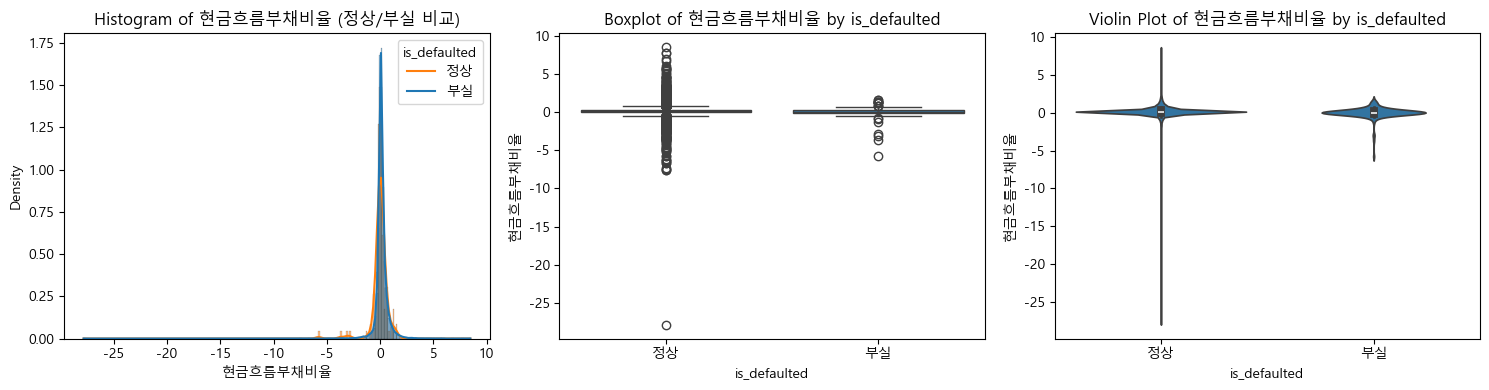

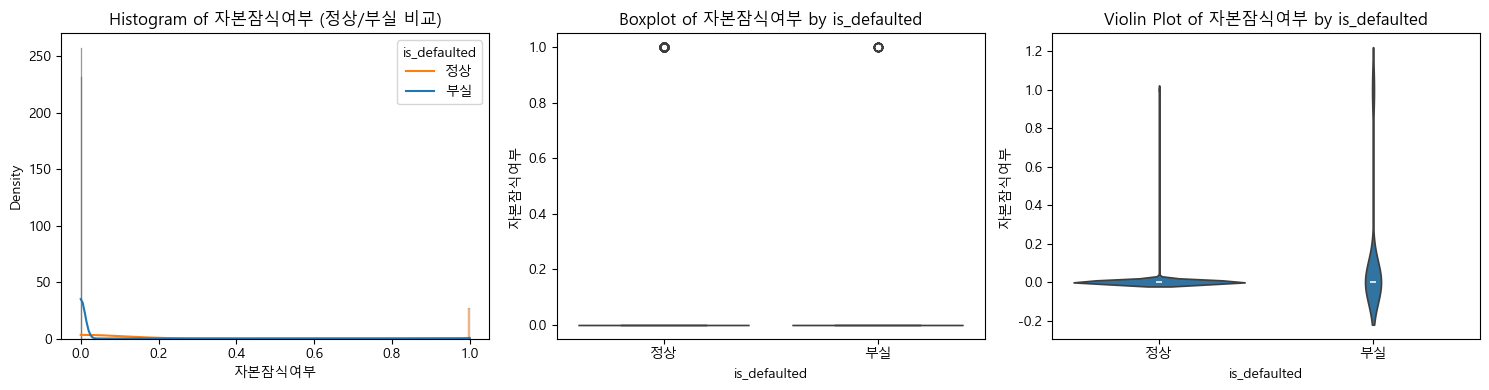

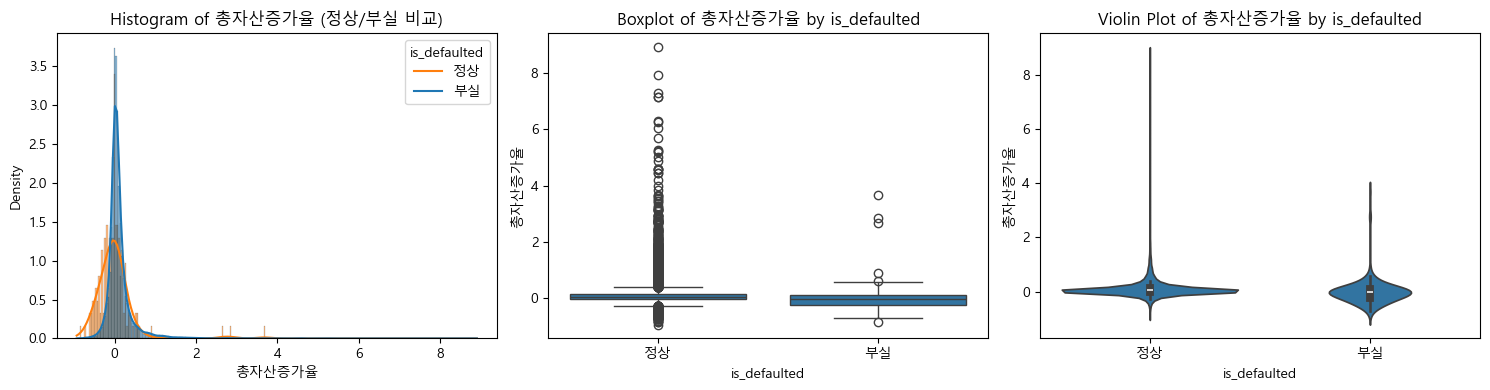

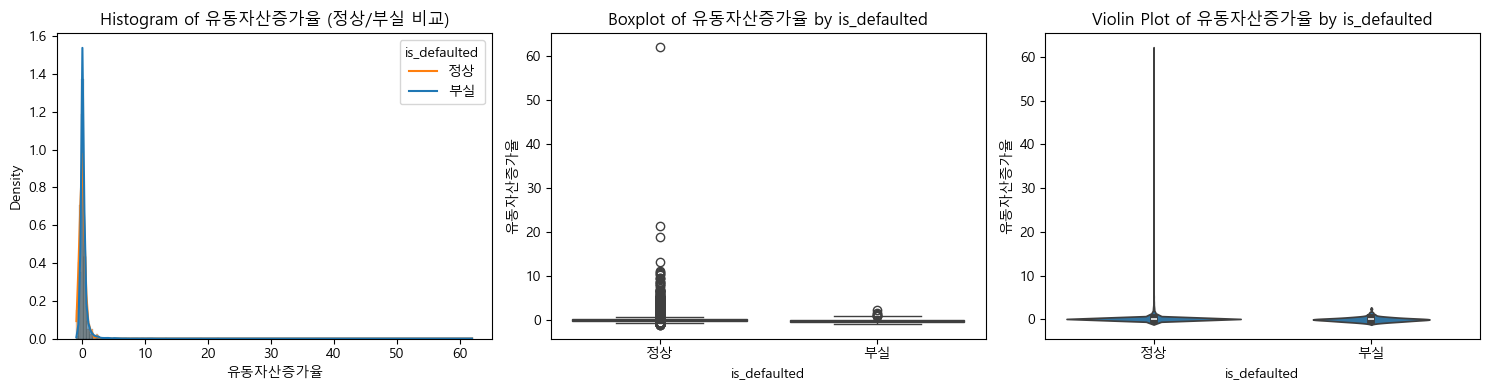

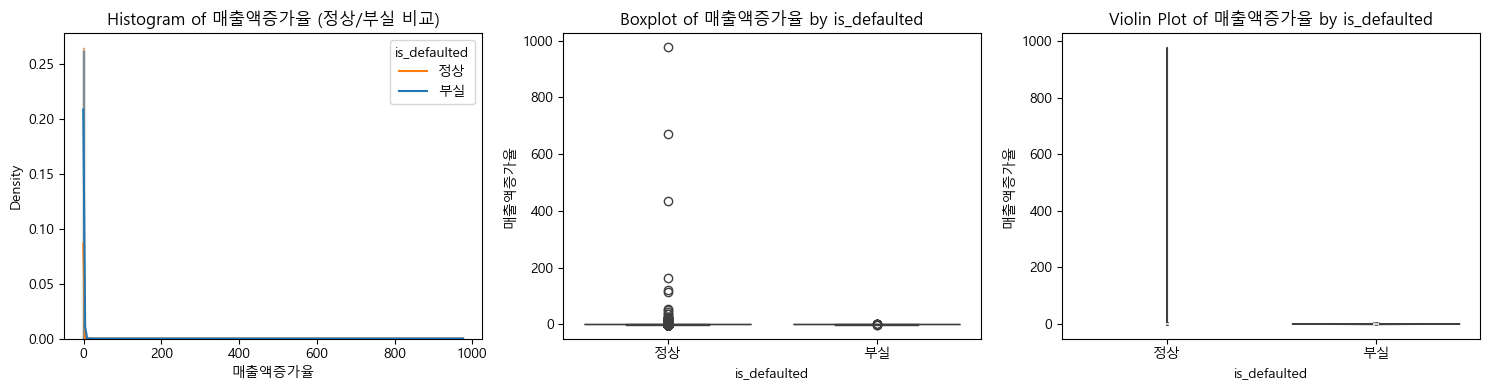

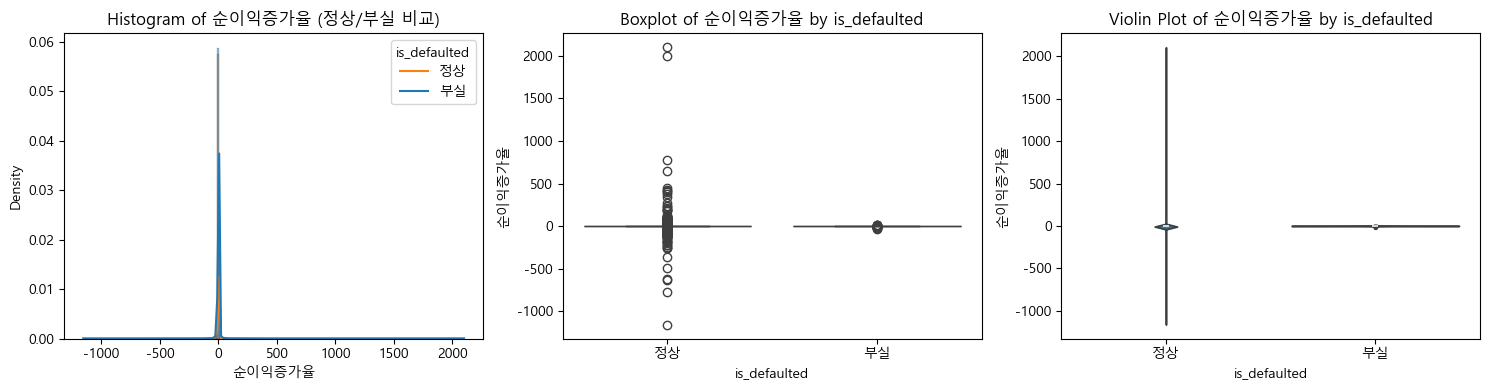

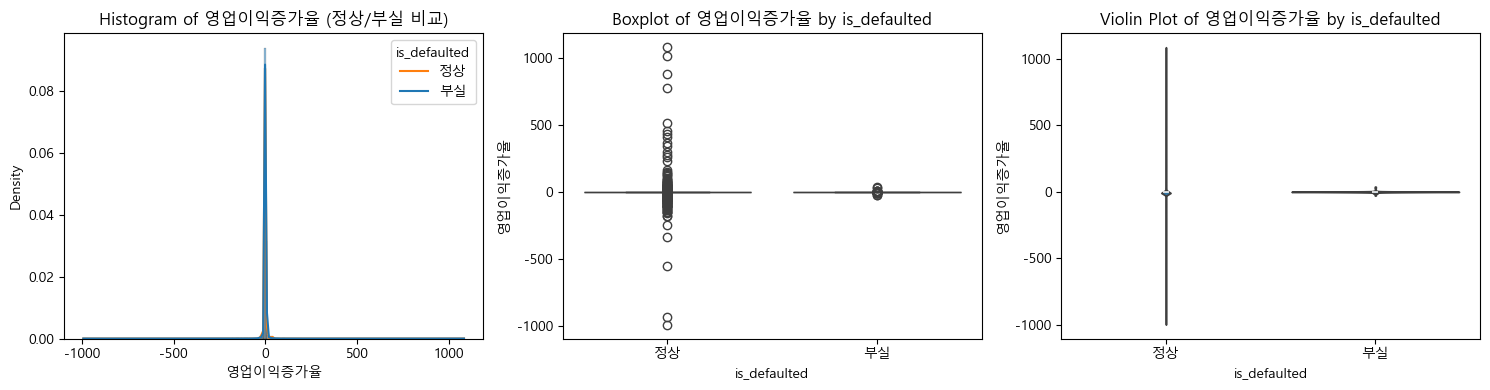

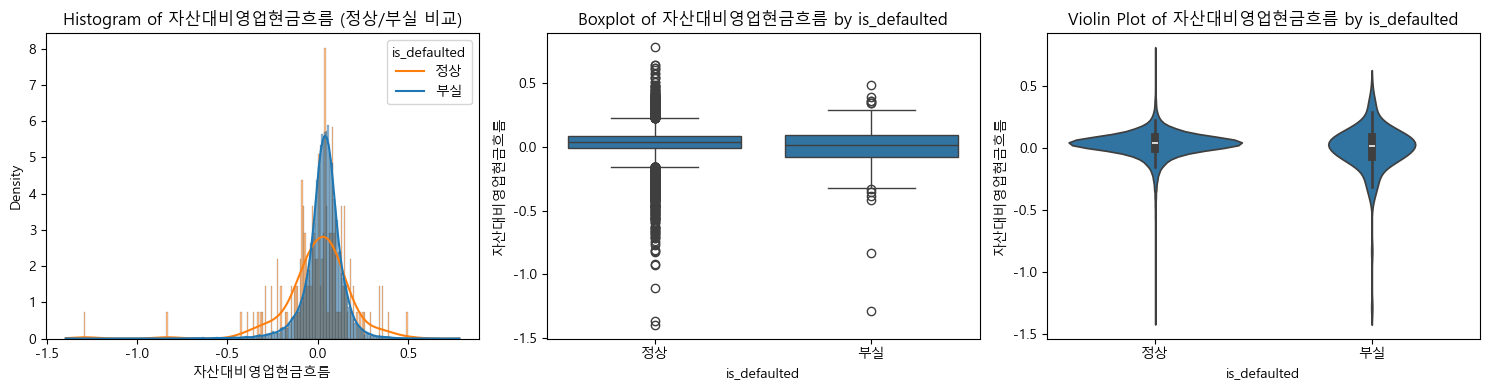

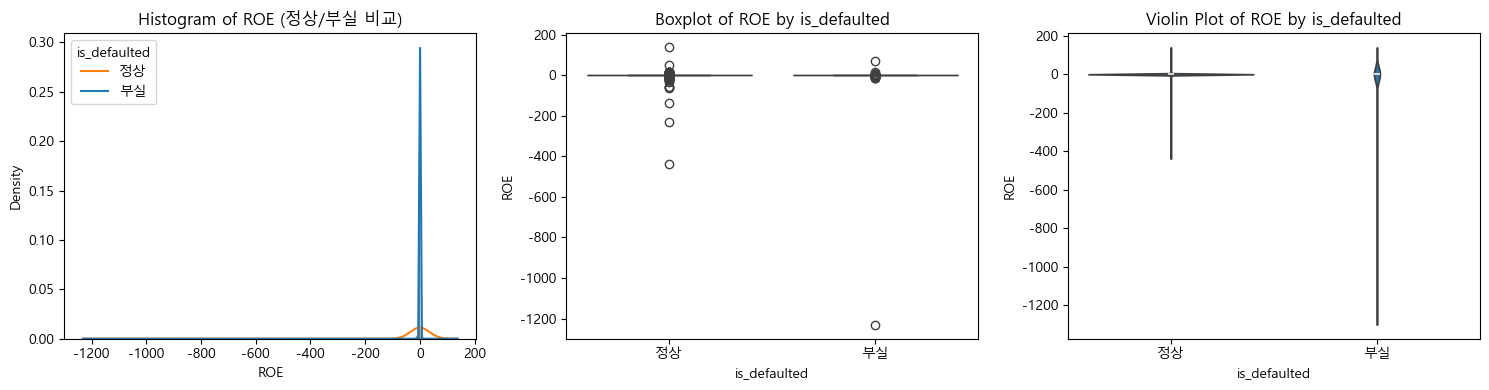

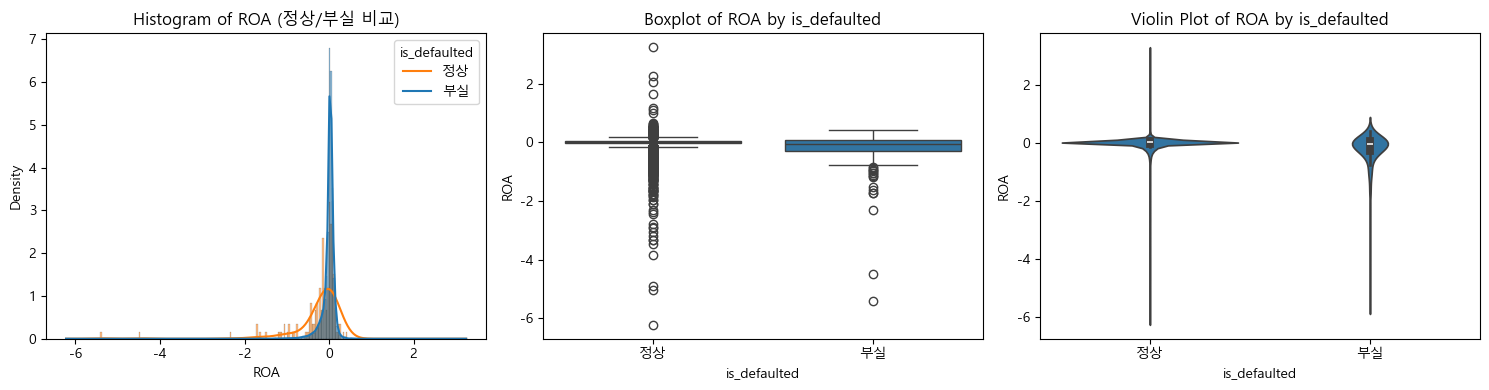

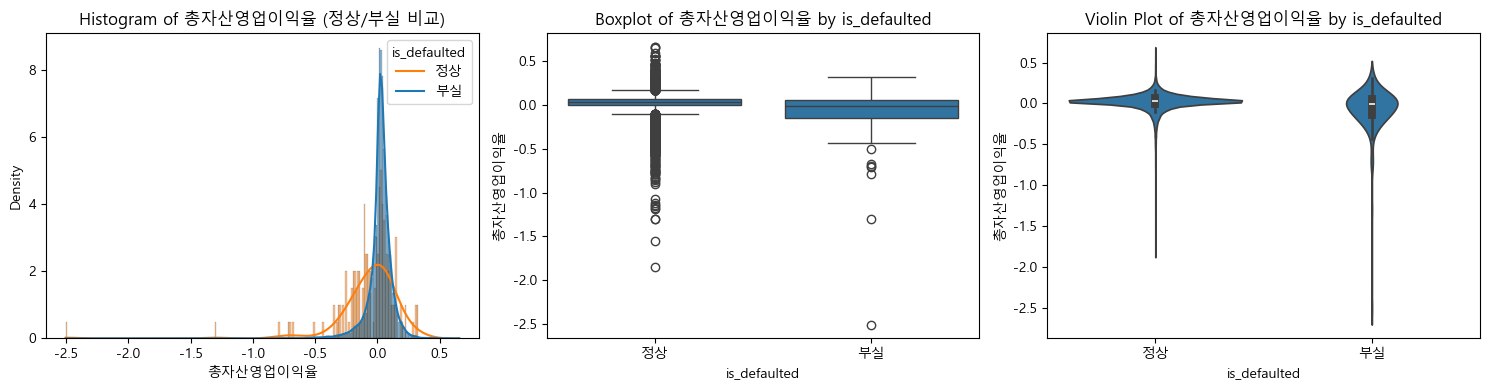

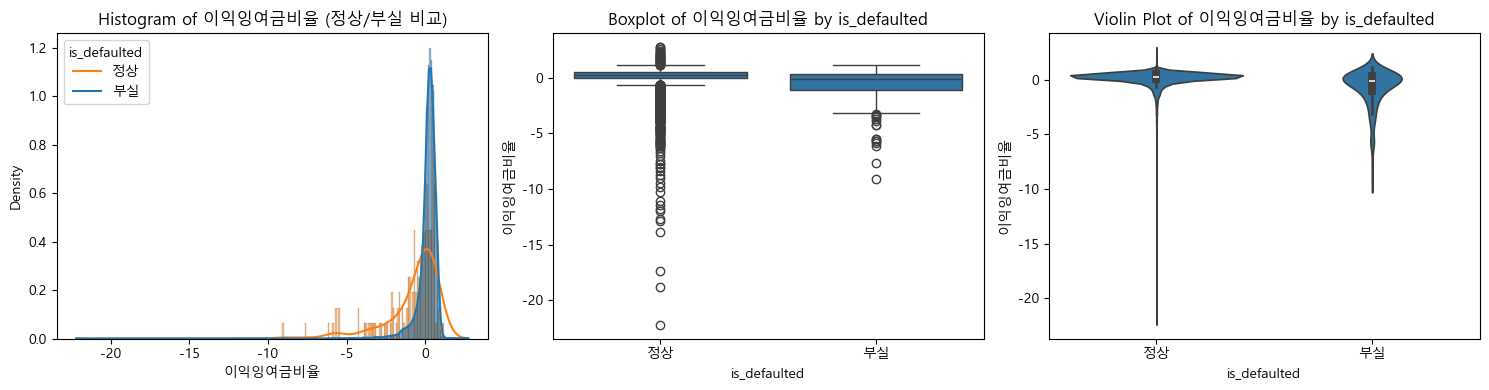

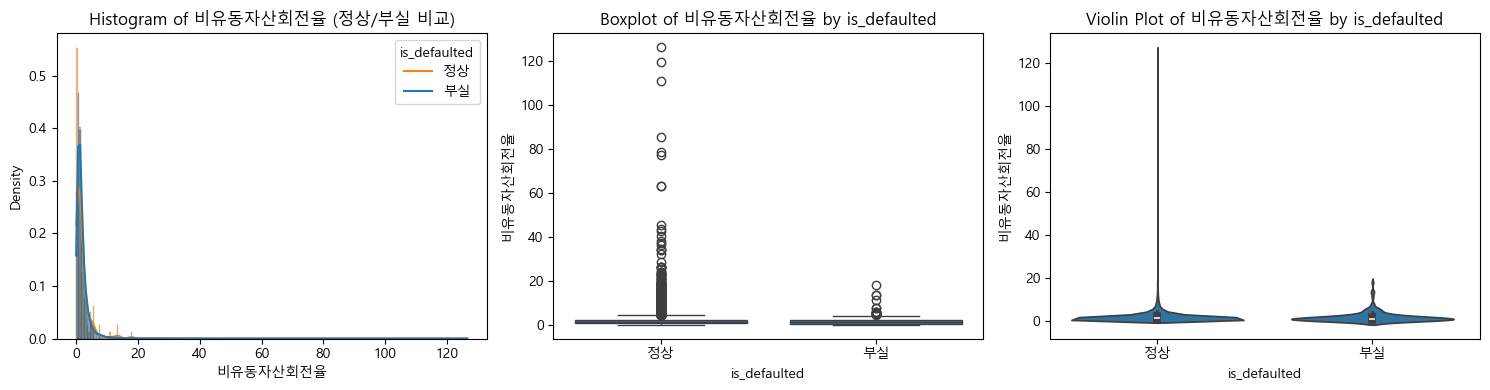

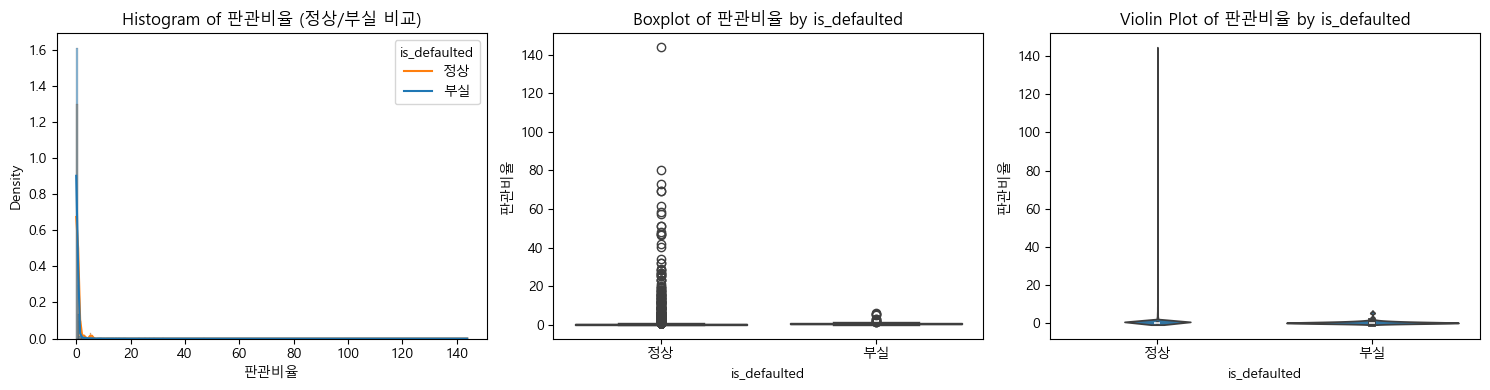

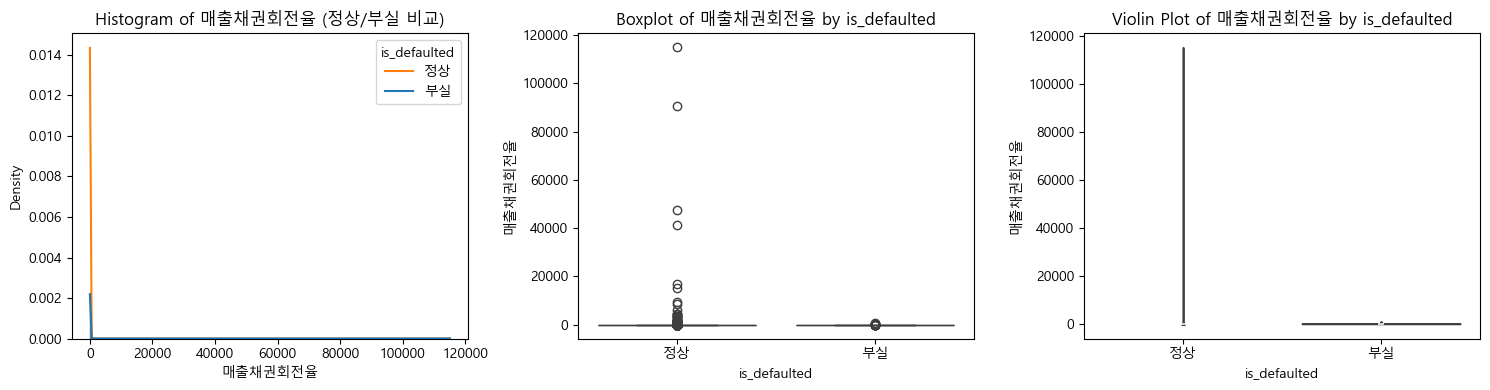

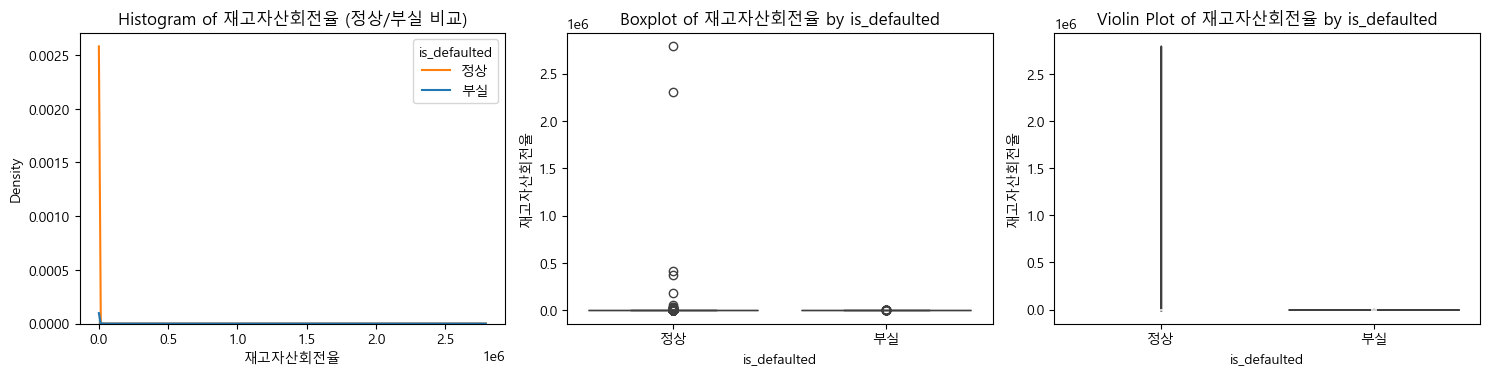

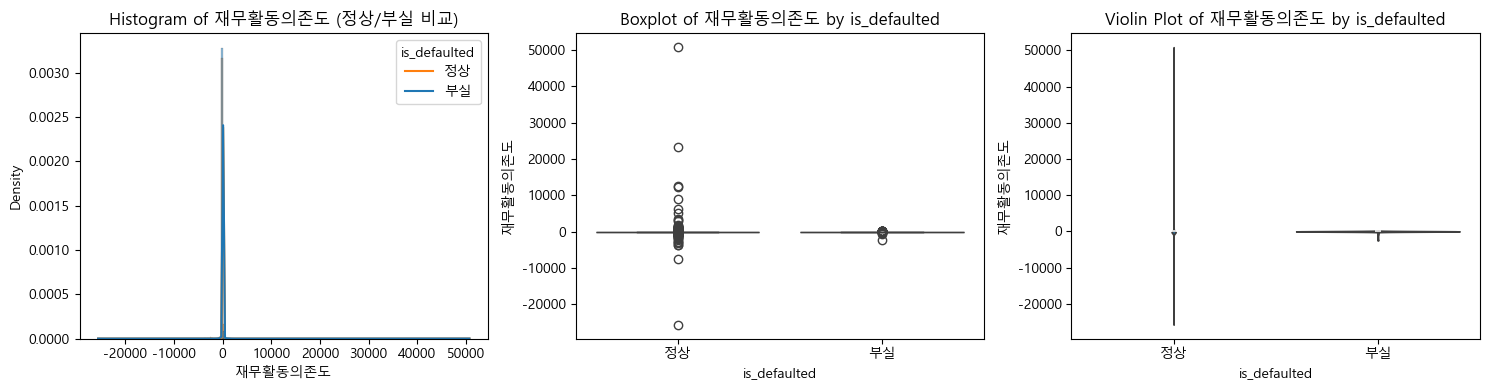

In [18]:
selected_vars = vif_data.loc[vif_data['VIF'] < 11, '변수명'].tolist()
filtered_df = df[selected_vars].copy()

# 'is_defaulted'이 filtered_df에 없으므로 drop하지 않고, 그냥 numeric columns만 추출
columns = filtered_df.select_dtypes(include=np.number).columns

for col in columns:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # 1. 정상/부실 전체 합산 히스토그램
    sns.histplot(data=df, x=col, hue=df['is_defaulted'], kde=True, stat='density', common_norm=False, ax=axes[0])
    axes[0].set_title(f'Histogram of {col} (정상/부실 비교)')
    axes[0].set_xlabel(col)
    axes[0].legend(title='is_defaulted', labels=['정상', '부실'])

    # 2. 정상/부실 그룹별 Boxplot
    sns.boxplot(x=df['is_defaulted'], y=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col} by is_defaulted')
    axes[1].set_xlabel('is_defaulted')
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['정상', '부실'])

    # 3. 정상/부실 그룹별 Violinplot
    sns.violinplot(x=df['is_defaulted'], y=df[col], ax=axes[2])
    axes[2].set_title(f'Violin Plot of {col} by is_defaulted')
    axes[2].set_xlabel('is_defaulted')
    axes[2].set_xticks([0, 1])
    axes[2].set_xticklabels(['정상', '부실'])

    plt.tight_layout()
    plt.show()      

### 2. Q-Q Plot (정규성 검정)

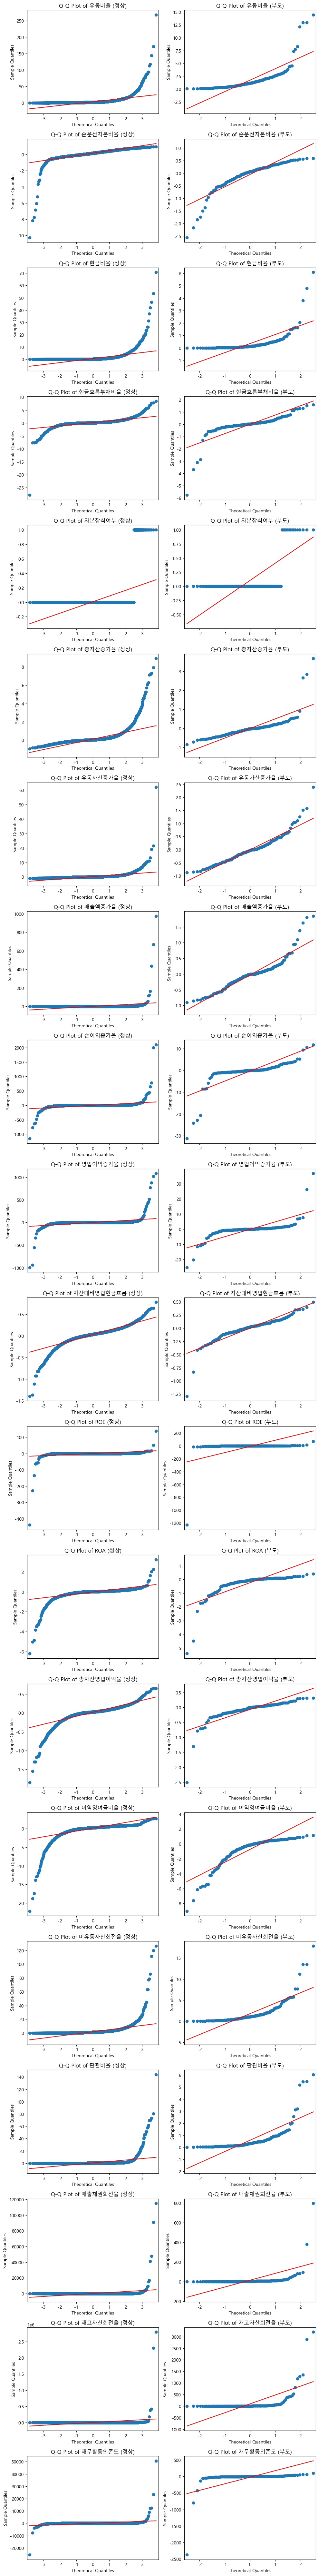

In [21]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
columns = filtered_df.select_dtypes(include=np.number).columns
n_cols = 2  # 정상, 부도
n_rows = len(columns)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))

for i, col in enumerate(columns):
    # 정상 그룹
    sm.qqplot(df.loc[df['is_defaulted'] == 0, col].dropna(), line='s', ax=axes[i, 0])
    axes[i, 0].set_title(f"Q-Q Plot of {col} (정상)")
    # 부도 그룹
    sm.qqplot(df.loc[df['is_defaulted'] == 1, col].dropna(), line='s', ax=axes[i, 1])
    axes[i, 1].set_title(f"Q-Q Plot of {col} (부도)")

plt.tight_layout()
plt.show()

In [22]:
filtered_df

,유동비율,순운전자본비율,현금비율,현금흐름부채비율,자본잠식여부,총자산증가율,유동자산증가율,매출액증가율,순이익증가율,영업이익증가율,자산대비영업현금흐름,ROE,ROA,총자산영업이익율,이익잉여금비율,비유동자산회전율,판관비율,매출채권회전율,재고자산회전율,재무활동의존도
0,2.977472,0.309009,0.998145,0.248090,0,-0.026410,-0.071547,0.188520,-22.274784,-6.764068,0.042608,-0.077842,-0.064473,-0.045428,-0.995696,0.893616,0.457622,1.707400,3.159645,-0.000000
1,8.621464,0.627460,0.280862,0.336434,0,0.961053,1.991641,0.219213,-1.464132,-1.673215,0.029928,0.016749,0.015259,0.015595,-0.491499,1.023664,0.351099,2.283892,3.075405,-126.704161
2,7.462783,0.642002,0.197396,0.167590,0,-0.012720,0.031167,0.259806,0.674026,-0.099463,0.017780,0.028944,0.025873,0.014225,-0.031010,1.465575,0.396754,2.476979,2.972674,0.103611
3,9.578557,0.637134,0.447202,0.085283,0,0.043915,0.001762,0.200532,1.139414,0.647510,0.007753,0.058328,0.053025,0.022450,0.020186,1.510621,0.404536,2.620212,3.164139,0.000000
4,16.180723,0.734891,1.446795,0.233630,0,0.680743,0.850600,0.175633,-0.496923,0.014002,0.014687,0.016936,0.015871,0.013544,0.026293,1.407200,0.448953,2.704433,3.282160,14.273772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16673,0.343592,-0.302380,0.053690,-0.045929,0,-0.506186,-0.407036,-0.861878,-0.457980,-0.636532,-0.043834,-2.980377,-0.135948,-0.038174,-0.120365,0.299282,0.137409,36.424001,13.088536,-52.019649
16674,0.351135,-0.332736,0.051766,-0.004718,1,-0.263312,-0.161929,-0.122427,-0.288349,-0.713495,-0.005052,1.899360,-0.131327,-0.014846,-0.294991,0.365989,0.107766,31.290646,10.654041,-11.105439
16675,2.002908,0.108377,0.124145,-0.018142,0,-0.129149,0.046793,-0.043661,-1.421694,-0.561965,-0.010231,0.145824,0.063593,-0.007468,-0.276054,0.420577,0.087965,17.356375,11.194468,0.695282
16676,1.490015,0.084447,0.722910,0.168533,0,0.181499,0.401721,0.786857,-0.115955,-14.535954,0.094893,0.108899,0.047583,0.085553,-0.185525,0.670591,0.042568,26.562507,12.438512,1.941652


In [24]:
# VIF가 11 미만인 변수만 추출한 데이터프레임
df_vif_under_11 = df[['stock_code', 'year', 'corp_nm', 'is_defaulted'] + vif_data.loc[vif_data['VIF'] < 11, '변수명'].tolist()]
df_vif_under_11.head()

,stock_code,year,corp_nm,is_defaulted,유동비율,순운전자본비율,현금비율,현금흐름부채비율,자본잠식여부,총자산증가율,...,자산대비영업현금흐름,ROE,ROA,총자산영업이익율,이익잉여금비율,비유동자산회전율,판관비율,매출채권회전율,재고자산회전율,재무활동의존도
0,058820,2015,(주)CMG제약,0,2.977472,0.309009,0.998145,0.248090,0,-0.026410,...,0.042608,-0.077842,-0.064473,-0.045428,-0.995696,0.893616,0.457622,1.707400,3.159645,-0.000000
1,058820,2016,(주)CMG제약,0,8.621464,0.627460,0.280862,0.336434,0,0.961053,...,0.029928,0.016749,0.015259,0.015595,-0.491499,1.023664,0.351099,2.283892,3.075405,-126.704161
2,058820,2017,(주)CMG제약,0,7.462783,0.642002,0.197396,0.167590,0,-0.012720,...,0.017780,0.028944,0.025873,0.014225,-0.031010,1.465575,0.396754,2.476979,2.972674,0.103611
3,058820,2018,(주)CMG제약,0,9.578557,0.637134,0.447202,0.085283,0,0.043915,...,0.007753,0.058328,0.053025,0.022450,0.020186,1.510621,0.404536,2.620212,3.164139,0.000000
4,058820,2019,(주)CMG제약,0,16.180723,0.734891,1.446795,0.233630,0,0.680743,...,0.014687,0.016936,0.015871,0.013544,0.026293,1.407200,0.448953,2.704433,3.282160,14.273772


In [25]:
df_vif_under_11.to_csv("features_v1_vif.csv", encoding="utf-8-sig")